In [1]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
import joblib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

In [19]:
#model = joblib.load('Model_developed_RandomForestRegression.joblib')
model = joblib.load('Insect_Model_developed_RandomForestRegression.joblib')
data = pd.read_excel('Insect_B5_Test.xlsx')

In [20]:
all_x_columns = data.iloc[:,:-1]

scaler = MinMaxScaler()
all_x_columns[list(all_x_columns.columns)] = scaler.fit_transform(all_x_columns[list(all_x_columns.columns)]) 

X = all_x_columns.values

In [21]:


predictions=model.predict(X)
print(predictions.shape)
print(predictions)

(53,)
[5.41671184e-02 1.79881595e-02 2.12321929e-02 8.74210891e-03
 3.45086346e-04 5.73036172e-04 9.20553909e-03 0.00000000e+00
 0.00000000e+00 9.89966343e-03 8.13603426e-03 0.00000000e+00
 9.89966343e-03 8.13517584e-05 0.00000000e+00 0.00000000e+00
 6.92589295e-06 1.30437969e-03 1.11231876e-03 1.12971594e-03
 3.71946103e-05 4.94706639e-06 3.08912984e-03 9.44065169e-05
 3.13913849e-04 1.65000369e-03 1.24088915e-04 8.93323670e-03
 4.54097476e-04 2.64279372e-03 2.34376466e-03 2.54972169e-03
 2.65869231e-03 2.25556528e-03 3.23704355e-03 8.64235192e-03
 1.60500128e-02 1.60852040e-02 4.54051873e-02 3.80329196e-02
 5.87693783e-02 7.92979290e-02 1.15979985e-01 2.21895290e-01
 2.79364039e-01 1.47645662e-01 2.28760401e-01 3.14494209e-01
 2.13555153e-01 2.29969829e-01 2.45767605e-01 1.39264930e-01
 4.77336801e-02]


In [22]:
output= data.copy()
output['Insect count pred'] = predictions
output.to_excel('Insect_B5_Test_Full_prediction.xlsx', index = False)

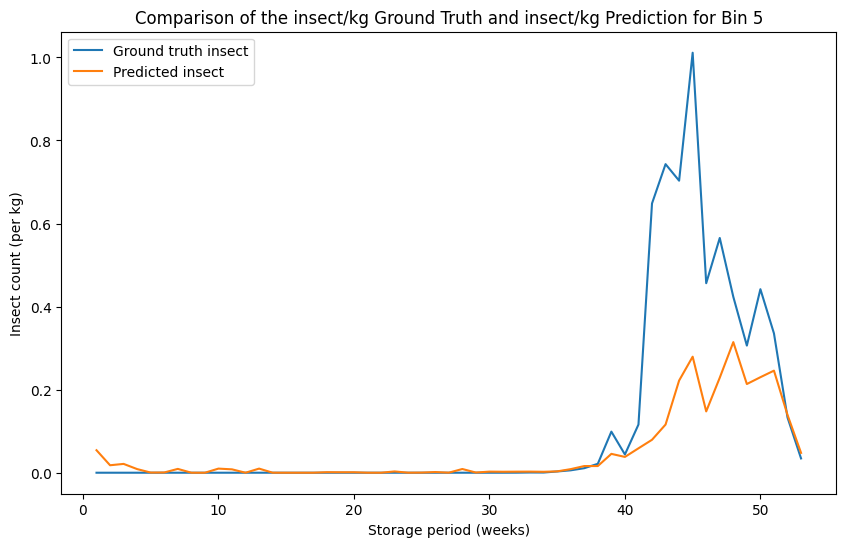

In [23]:
# Plot data
output_data = pd.read_excel('Insect_B5_Test_Full_prediction.xlsx')
gt_dml=output_data['Insect count per kg']
pred_dml= output_data['Insect count pred']
storage_dml_time = output_data['Week']

plt.figure(figsize=(10,6))
#plt.plot(gt_dml,label='Ground truth DML', marker='o')
#plt.plot(pred_dml,label='Predicted DML', marker='s')
#using the actual storage time data
plt.plot(storage_dml_time, gt_dml,label='Ground truth insect')
plt.plot(storage_dml_time, pred_dml,label='Predicted insect')

plt.title('Comparison of the insect/kg Ground Truth and insect/kg Prediction for Bin 5')

plt.xlabel('Storage period (weeks)')
plt.ylabel('Insect count (per kg)')
plt.legend()
plt.show()


In [24]:
# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(gt_dml, pred_dml)
rmse = np.sqrt(mse)
r2 = r2_score(gt_dml, pred_dml)

print(f"Test MSE: {mse:.5f}")
print(f"Test RMSE: {rmse:.5f}")
print(f"Test R²: {r2:.4f}")


Test MSE: 0.03352
Test RMSE: 0.18310
Test R²: 0.3956


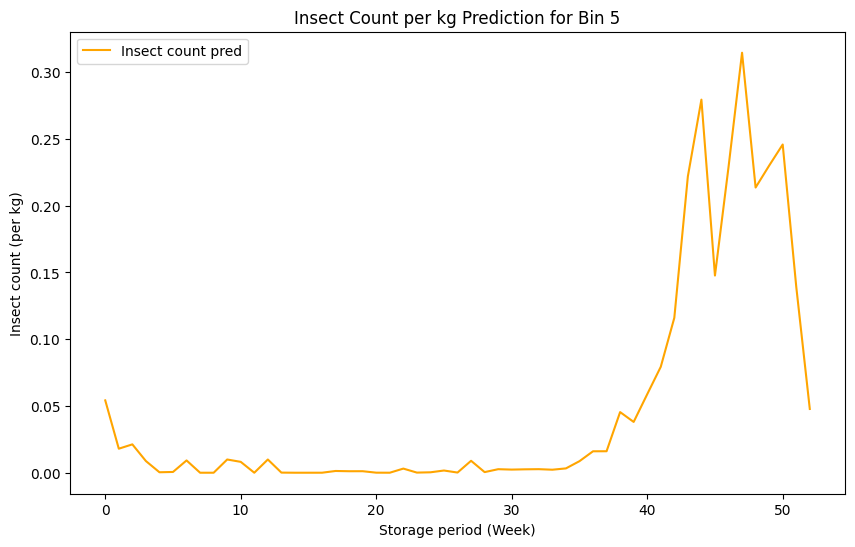

: 

In [25]:
gt_dml=output_data['Insect count per kg']
pred_dml= output_data['Insect count pred']

plt.figure(figsize=(10,6))

plt.plot(pred_dml,label='Insect count pred', color='orange')

plt.xlabel('Storage period (Week)')
plt.ylabel('Insect count (per kg)')
plt.title('Insect Count per kg Prediction for Bin 5')
plt.legend()
plt.show()